# LOADING LIBRARIES

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:

#import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd
#import networkx as nx
#import csv
#from sys import stdin
#from networkx.algorithms.community import greedy_modularity_communities
#from networkx.algorithms.community import k_clique_communities
#from networkx.algorithms.community import asyn_lpa_communities
#from networkx.algorithms.community import modularity
#from cdlib import algorithms, readwrite, viz
#from sklearn.manifold import TSNE
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.metrics import accuracy_score
#from gensim.models import Word2Vec
from sklearn import preprocessing
import sklearn.metrics as sk_metrics
#import seaborn as sns

#################
def fixed_metrics(y,y_pred):
    from sklearn import metrics
    import pandas as pd
    import sklearn.metrics as sk_metrics
    

    cm = sk_metrics.confusion_matrix(y, y_pred)

    results_partial = y.copy()
    results_partial=pd.DataFrame(results_partial)
    results_partial["pred"] = y_pred
    results_partial = results_partial[(results_partial.iloc[:,0]<1)]
    
    alfa = sum(results_partial["pred"])/results_partial.shape[0]
    beta = 1
    
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)

    
    TN = cm[0,0]
    FN = cm[1,0]
    TP = cm[1,1]
    FP = cm[0,1]
    
    theta = (TP+FP)/(TP+FN+TN+FP)
    n=FP/(TN+FP)
    #pi = (TP+FN)/(TP+FN+TN+FP)
    c= len(y[(y.iloc[:,0]==1)])/(len(y[(y.iloc[:,0]==1)])+len(y[(y.iloc[:,0]==0)]))
    gamma = TP/(TP+FN)
    if beta-alfa==0:
        gamma_cr = float('inf')
        n_cr = float('inf')
    else:
        gamma_cr = ((beta-alfa)**-1)*((1-alfa)*gamma-(1-beta)*n)
        n_cr = ((beta-alfa)**-1)*((beta*n)-(alfa*gamma))
        
    pi_cr = (c*beta)+((1-c)*alfa)
    ##metrics
    ACC_cr = (pi_cr*gamma_cr) + ((1-pi_cr)*(1-n_cr))
    bacc_cr = (1 + (gamma_cr - n_cr))/2
    f_cr = (2*pi_cr*gamma_cr)/(pi_cr+theta)
    mcc_cr = (pi_cr*(1-pi_cr)/theta*(1-theta))*(gamma_cr-n_cr)
    
    auc_r = metrics.auc(fpr, tpr)
    auc_cr = (auc_r-(1-(beta-alfa)))/(beta-alfa)
    alfa = sum(results_partial["pred"])/results_partial.shape[0]
    
    metrics_df =[[auc_r,auc_cr,ACC_cr,bacc_cr,f_cr,mcc_cr,alfa]]
    return(metrics_df)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [9]:
filename = "D:/REPO_GITHUB/ALUMINUM_GENES_CLASSIFICATION/RESULTS/UNWEIGHTED/ADASAMPLING_UNWEIGHTED_JJG.TSV"
#filename = "/users/ccsosaa/pecanpy/BIG_COMP_W.emb"
data = pd.read_csv(filename,index_col=0,header="infer",sep="\t")
print(data)

                        1  prob_lda  prob_svm  prob_logit  pred_lda  pred_svm  \
preds_list2[[1]]$genes                                                          
LOC_Os03g50290          0  0.670090  0.159933    0.534466         0         0   
LOC_Os04g38870          0  0.618737  0.359990    0.537029         0         0   
LOC_Os08g33370          0  0.670409  0.287846    0.516961         0         0   
LOC_Os08g37490          0  0.643871  0.207286    0.532601         0         0   
LOC_Os02g36974          0  0.661472  0.297671    0.522527         0         0   
...                    ..       ...       ...         ...       ...       ...   
LOC_Os01g59290          0  0.996807  0.059035    0.490240         0         1   
LOC_Os06g07220          0  0.995907  0.025838    0.495096         0         1   
LOC_Os01g55190          0  0.991647  0.028209    0.512879         0         1   
LOC_Os02g31100          0  0.992133  0.035122    0.557692         0         1   
LOC_Os04g57150          0  0

# threshold svm


In [10]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(data["1"], data["prob_svm"])

Best Threshold=0.562705, G-Mean=0.794


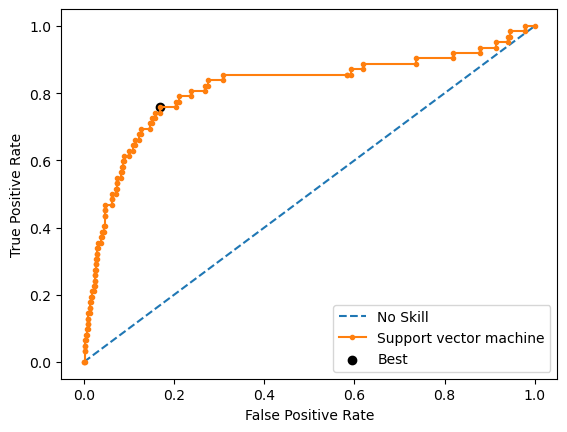

In [11]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Support vector machine')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [12]:
for i in range(len(data["pred_svm"])):
    if data["prob_svm"][i] > thresholds[ix]:
        data["pred_svm"][i] = 1
    else:
        data["pred_svm"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\3173681702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_svm"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\3173681702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_svm"][i] = 1


In [13]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_svm"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.7867023335701104, 0.7434689454259452, 0.9124006680797201, 0.8448141426514759, 0.7439495605153411, 0.4764533017416977, 0.16853081673074682]]


### precision - recall svm

Best Threshold=0.942218, F-Score=nan


C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\3785998188.py:2: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


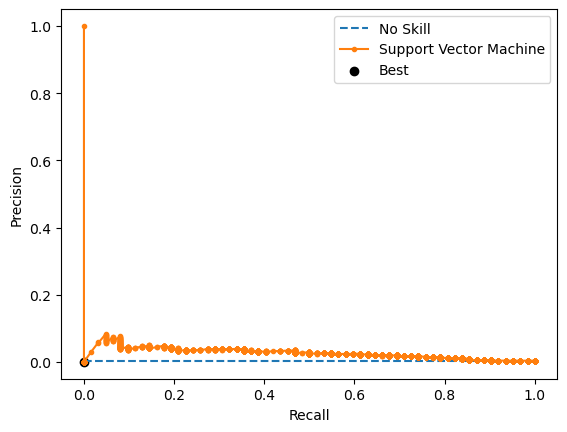

In [14]:
precision, recall, thresholds = precision_recall_curve(y,data["prob_svm"])
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(data["1"][data["1"]==1]) / len(data["1"])
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Support Vector Machine')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [15]:
data["pred_svm_PR"] = data["pred_svm"] #This works. This will create a new column with None type

for i in range(len(data["pred_svm_PR"])):
    if data["prob_svm"][i] > thresholds[ix]:
        data["pred_svm_PR"][i] = 1
    else:
        data["pred_svm_PR"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\3623747060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_svm_PR"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\3623747060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_svm_PR"][i] = 1


In [16]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_svm_PR"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.4990970523127112, 0.49819083746717246, 0.9928024146737868, 0.4990954187335862, 0.0, -0.005388475513185835, 0.0018058953745776535]]


# threshold lda


In [17]:
fpr, tpr, thresholds = roc_curve(data["1"], data["prob_lda"])

Best Threshold=0.720663, G-Mean=0.355


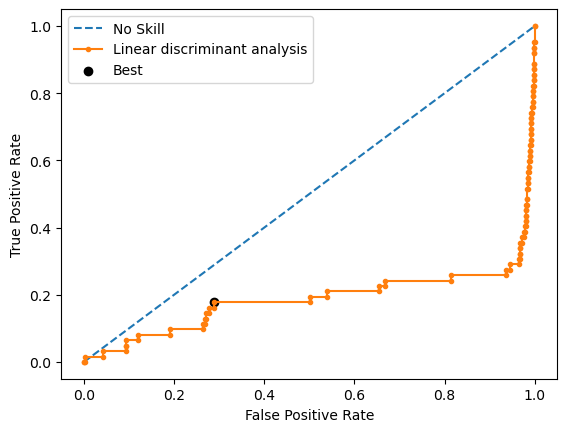

In [18]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Linear discriminant analysis')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [19]:
for i in range(len(data["pred_lda"])):
    if data["prob_lda"][i] > thresholds[ix]:
        data["pred_lda"][i] = 1
    else:
        data["pred_lda"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\3037855831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_lda"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\3037855831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_lda"][i] = 1


In [20]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_lda"]
y_pred = y_pred.to_frame()
fixed_LDA = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_LDA)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.43658131415062784, 0.20853967583548907, 0.5154100226937394, 0.4109128345916266, 0.1621320625218529, -0.09096932771584641, 0.2881276942793895]]


### precision - recall lda

Best Threshold=0.989033, F-Score=nan


C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\659346349.py:2: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


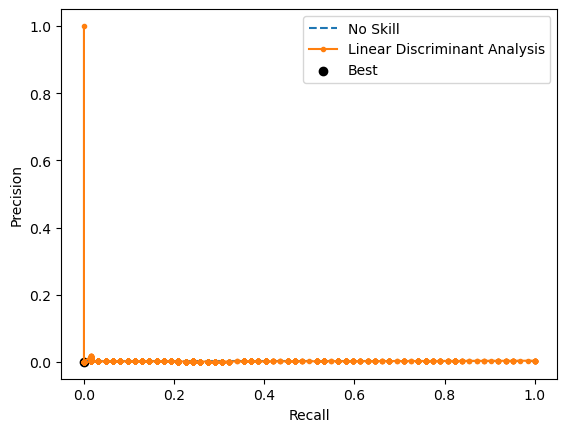

In [21]:
precision, recall, thresholds = precision_recall_curve(y,data["prob_lda"])
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(data["1"][data["1"]==1]) / len(data["1"])
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Linear Discriminant Analysis')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [22]:
data["pred_lda_PR"] = data["pred_lda"] #This works. This will create a new column with None type

for i in range(len(data["pred_lda_PR"])):
    if data["prob_lda"][i] > thresholds[ix]:
        data["pred_lda_PR"][i] = 1
    else:
        data["pred_lda_PR"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\2135350384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_lda_PR"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\2135350384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_lda_PR"][i] = 1


In [23]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_lda_PR"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.4983979960386811, 0.49678569341359363, 0.990016252612027, 0.4983928467067968, 0.0, -0.00676958904972111, 0.003204007922637772]]


# threshold logit


In [25]:
fpr, tpr, thresholds = roc_curve(data["1"], data["prob_logit"])

Best Threshold=0.842232, G-Mean=0.907


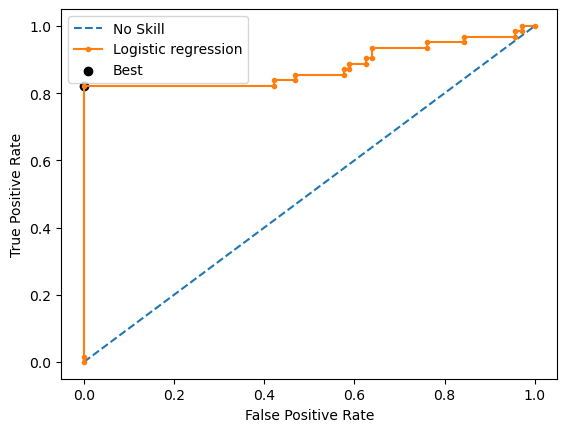

In [26]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic regression')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [28]:
for i in range(len(data["pred_logit"])):
    if data["prob_logit"][i] > thresholds[ix]:
        data["pred_logit"][i] = 1
    else:
        data["pred_logit"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\1277326074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_logit"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\1277326074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_logit"][i] = 1


In [29]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_logit"]
y_pred = y_pred.to_frame()
fixed_RF= fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_RF)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.9032258064516129, 0.9032258064516129, 0.99930345948456, 0.9032258064516129, 0.8928571428571427, 0.9935093997929623, 0.0]]


### precision - recall logit

Best Threshold=0.842232, F-Score=0.903


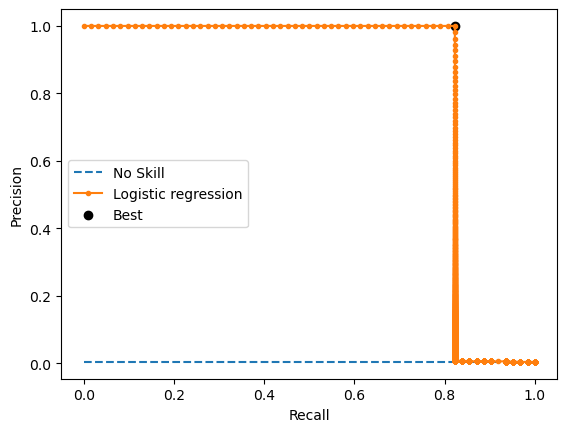

In [31]:
precision, recall, thresholds = precision_recall_curve(y,data["prob_logit"])
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(data["1"][data["1"]==1]) / len(data["1"])
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic regression')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [32]:
data["pred_logit_PR"] = data["pred_logit"] #This works. This will create a new column with None type

for i in range(len(data["pred_logit_PR"])):
    if data["prob_logit"][i] > thresholds[ix]:
        data["pred_logit_PR"][i] = 1
    else:
        data["pred_logit_PR"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\2729887191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_logit_PR"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_13432\2729887191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pred_logit_PR"][i] = 1


In [33]:
y = data["1"]
y = y.to_frame()
y_pred = data["pred_logit_PR"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.9032258064516129, 0.9032258064516129, 0.99930345948456, 0.9032258064516129, 0.8928571428571427, 0.9935093997929623, 0.0]]


# SAVING RESULTS

In [34]:
#y_pred

In [40]:
results = data[["1","prob_svm","pred_svm","pred_svm_PR","prob_logit","pred_logit","pred_logit_PR"]]

In [41]:
results.to_csv("D:/REPO_GITHUB/ALUMINUM_GENES_CLASSIFICATION/RESULTS/UNWEIGHTED/ADASAMPLING_JJG.csv")